## Logistic Regression

converting regression using log function and converting into S curve where data are between 0 to 1, so 0 to 0.5 belongs to one class and 0.5 to 1 belongs to another class.

It is a **Supervised** and **Classification** algorithm

### Why Logistic Regression called as "Regression"

In Linear Regression a real value 'y' is predicted based on weighted sum of inputs.

$$ y = w_1x_1 + w_2x_2 + ... + w_nx_n + w_0 $$

Where in Logistic Regression, it transform its output using the logistic sigmoid function to return a probability value between 0 and 1

$$ Sigmoid Function = \frac{1} {\left(1 + e^{-y} \right)} $$



---

[logistic-regression-intution](https://medium.com/@nikethnarasimhan/logistic-regression-an-intuitive-approach-b1ece5b13c)

Lets we have features $ x_1, x_2, ... , x_n $, and the target column is $ y $ and it has value 0 or 1 (binary class)

So, from linear regression we will get $ y = w_1x_1 + w_2x_2 + ... + w_nx_n + w_0 $

now lets say P = Probability of y == 1

now odds of event y = 1 will occure is 

$$ \frac{p}{1 - p} =  $$


will continue

---
### Linear Regression vs Logistic Regression

Linear Regression

* Purpose it to find best fitted line where all the data points covers
* Regression, target column contains continuous value
* Independent variable can be correlated with each other
* 


---



Identify species of penguin

In [74]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [38]:
df = pd.read_csv("Penguin.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Preprocessing

In [39]:
df.shape 

(344, 7)

In [40]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [41]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [42]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [43]:
# imputer will replace null value with different strategies [mean, median, most frequent, constant]

imputer = SimpleImputer(strategy='mean')
null_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[null_columns] = imputer.fit_transform(df[null_columns])

In [44]:
df.isna().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [45]:
imputer = SimpleImputer(strategy='most_frequent')
df[['sex']] = imputer.fit_transform(df[['sex']])

In [46]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [47]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [48]:
# Label encoder convert target labels with value between 0 and n_classes-1.

label_encoder = LabelEncoder()

df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

In [49]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [50]:
x = df.drop(['species'], axis=1)
y = df['species']

In [51]:
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,0


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [59]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [70]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.9710144927536232


In [71]:
train_accuracy = model.score(x_train, y_train)
print(f'Train accuracy: {train_accuracy}')

Train accuracy: 0.9963636363636363


In [72]:
y_pred

array([2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0,
       2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 1])

In [76]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.93      0.96        14
           2       1.00      0.96      0.98        27

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69



In [81]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, clf=model, legend=2)

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

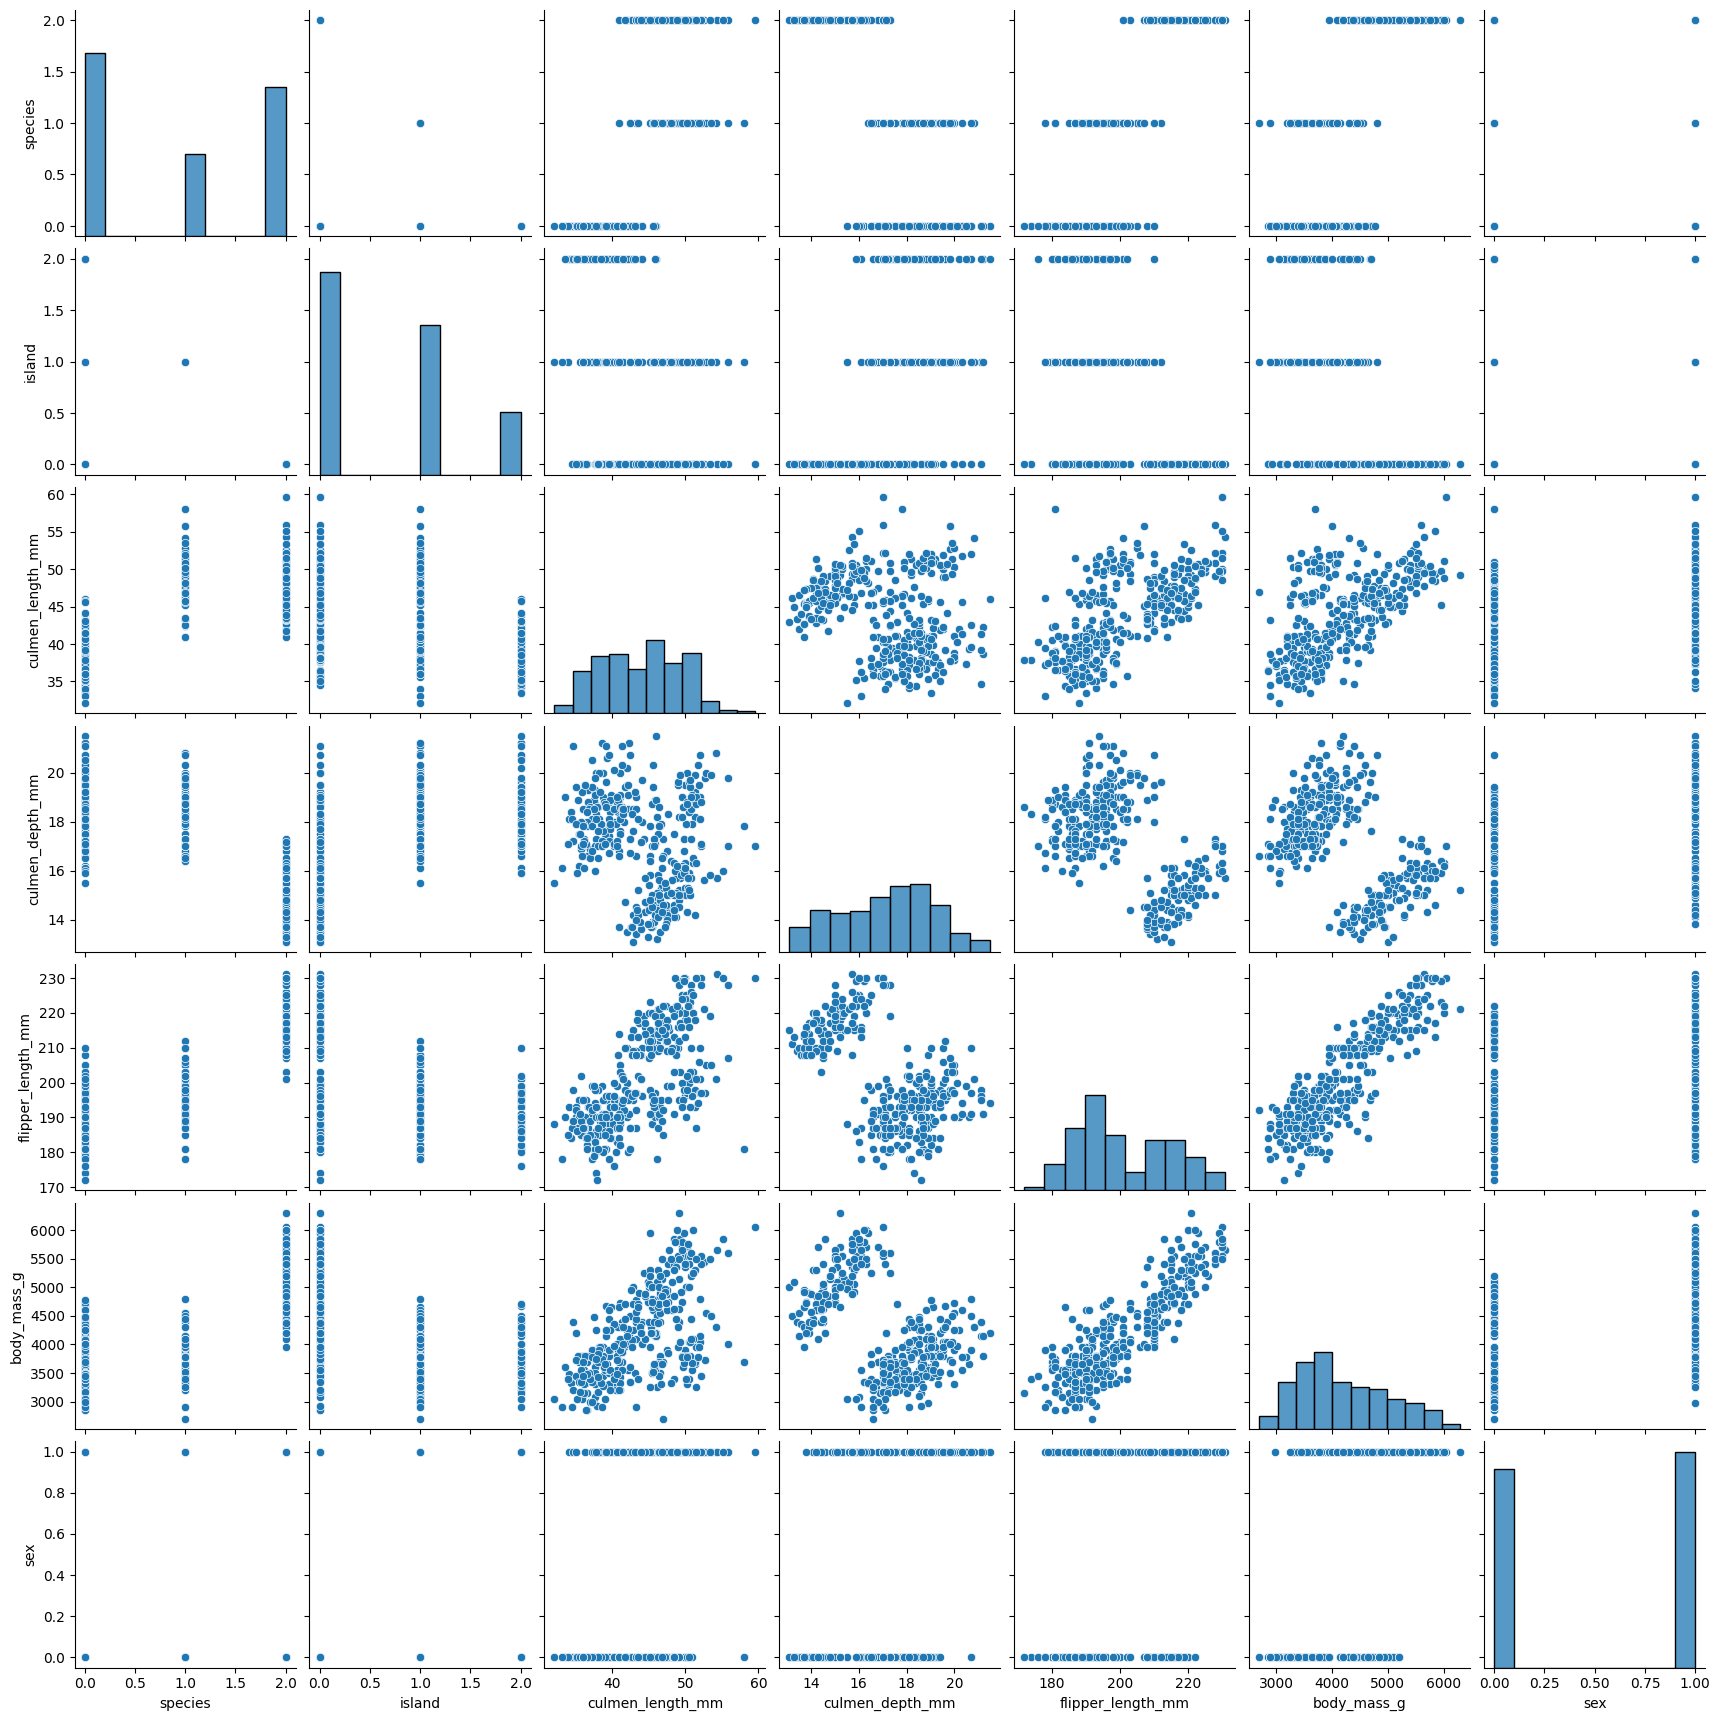

In [82]:
import seaborn as sns

sns.pairplot(df)